**Project: Predicting Breast Cancer Diagnosis with AdaBoost or Gradient Boosting**




Dataset: The Breast Cancer Wisconsin Dataset (available in scikit-learn)

Tools: Python, scikit-learn, pandas, matplotlib/seaborn

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

Exploratory Data Analysis

0
1    357
0    212
Name: count, dtype: int64


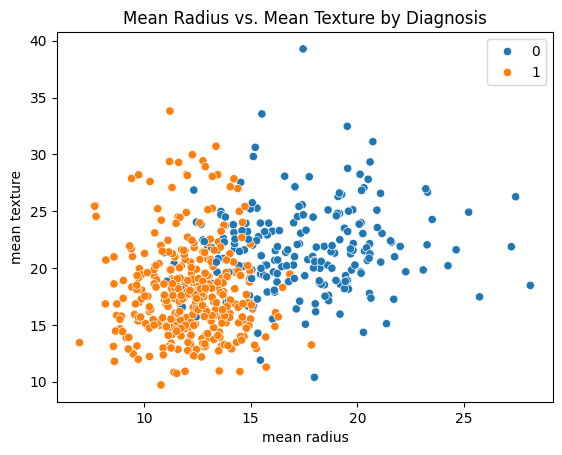

In [2]:
#Missing Values
print(X.isnull().sum().sum())
#Target Distribution
print(pd.Series(y).value_counts())

#Target Distribution Visualisation

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y)
plt.title('Mean Radius vs. Mean Texture by Diagnosis')
plt.savefig('scatterplot.png', bbox_inches='tight')
plt.show()

Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training: Baseline vs. Boosting

In [4]:
#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Baseline: Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9736842105263158


In [6]:
# AdaBoost
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=100,
    random_state=42
)
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

AdaBoost Accuracy: 0.9736842105263158
Gradient Boosting Accuracy: 0.956140350877193


Evaluation & Interpretaion


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



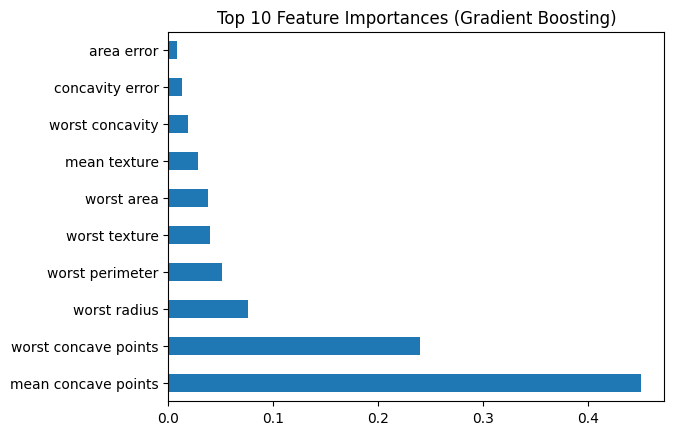

In [7]:
# Detailed evaluation
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, ada_pred))

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

# Feature importance (for Gradient Boosting)
feature_importance = pd.Series(gb.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

Hyperparameter Tuning



In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}
grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.score(X_test_scaled, y_test))

Best Params: {'learning_rate': 0.05, 'n_estimators': 100}
Best Accuracy: 0.956140350877193


Tuning Model

Tuned Gradient Boosting Accuracy: 0.956140350877193

Tuned Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



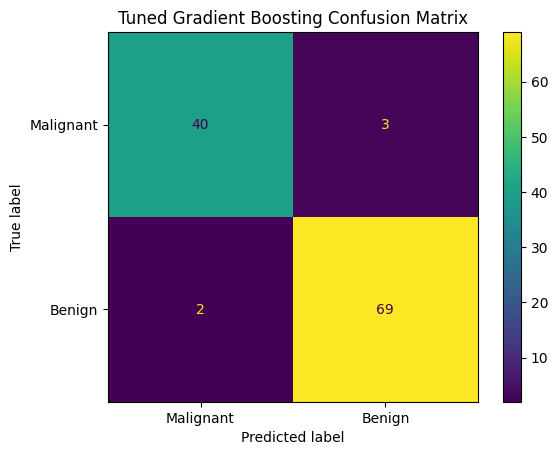

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tuned Gradient Boosting model Training
gb_tuned = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state=42)
gb_tuned.fit(X_train_scaled, y_train)
gb_tuned_pred = gb_tuned.predict(X_test_scaled)

# Accuracy & Classification report
print("Tuned Gradient Boosting Accuracy:", gb_tuned.score(X_test_scaled, y_test))
print("\nTuned Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_tuned_pred))

# Confusion Matrix
cm_gb_tuned = confusion_matrix(y_test, gb_tuned_pred)
disp_gb_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_gb_tuned, display_labels=['Malignant', 'Benign'])
disp_gb_tuned.plot()
plt.title('Tuned Gradient Boosting Confusion Matrix')
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

Feature Importance (After Tuning)

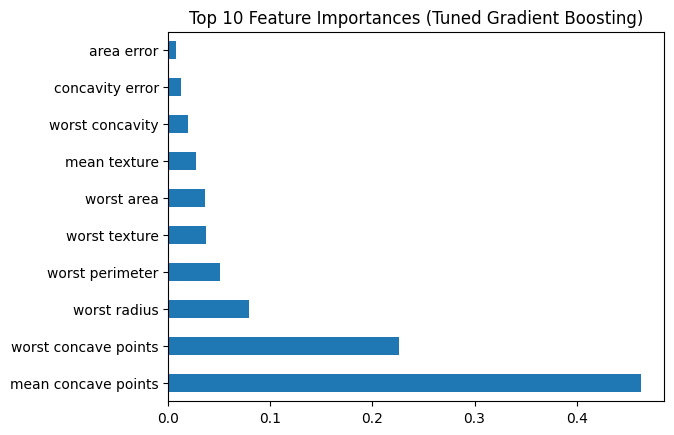

In [10]:
# Tuned trained GradientBoostingClassifier
feature_importance = pd.Series(gb_tuned.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Tuned Gradient Boosting)')
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

Model Comparison

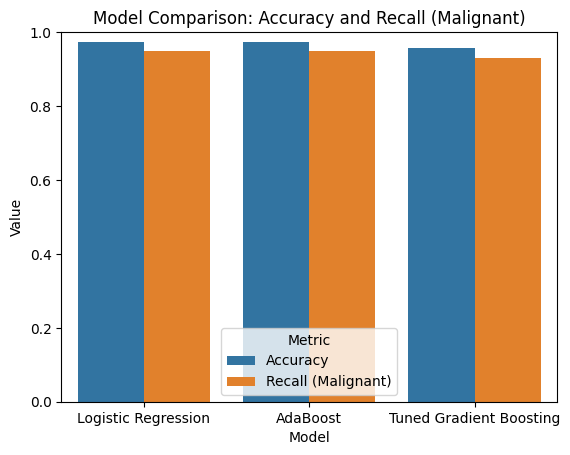

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics from your results
models = ['Logistic Regression', 'AdaBoost', 'Tuned Gradient Boosting']
accuracies = [0.974, 0.974, 0.956]
recalls_malignant = [0.95, 0.95, 0.93]

metrics_df = pd.DataFrame({
    'Model': models * 2,
    'Metric': ['Accuracy'] * 3 + ['Recall (Malignant)'] * 3,
    'Value': accuracies + recalls_malignant
})

sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df)
plt.title('Model Comparison: Accuracy and Recall (Malignant)')
plt.ylim(0, 1)
plt.savefig('model_comparison.png', bbox_inches='tight')
plt.show()

**Summary & Findings**

I developed Gradient Boosting and AdaBoost models to predict breast cancer diagnoses using the Breast Cancer Wisconsin Dataset, achieving 95.6% accuracy (93% recall for malignant cases) and 97.4% accuracy (95% recall), respectively, with Gradient Boosting tuned to learning_rate=0.05 and n_estimators=100. Gradient Boosting highlighted ‘mean concave points’ (44%) and ‘worst concave points’ (22%) as top predictors, aligning with clinical signs of tumor irregularity, while AdaBoost excelled at benign case recall (99%) through adaptive weighting. Compared to a 97.4% accurate Logistic Regression baseline, both boosting algorithms demonstrated robust performance, with high recall ensuring minimal missed diagnoses. This project showcases the power of boosting for interpretable, high-stakes medical classification, supporting early cancer detection.